In [27]:
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader,TensorDataset
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
style.use('dark_background')
import pandas as pd

In [28]:
import torch
torch.cuda.is_available()

True

In [29]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(device)

cuda:0


In [30]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [31]:
%cd /content/drive/MyDrive/Course Material/Supervised Machine Learning/Recurrent Neural Networks (RNN)

/content/drive/MyDrive/Course Material/Supervised Machine Learning/Recurrent Neural Networks (RNN)


# Importing the data

In [32]:
df2 = pd.read_csv('WESAD_Data/user2.csv', header = None)
df3 = pd.read_csv('WESAD_Data/user3.csv', header = None)
df4 = pd.read_csv('WESAD_Data/user4.csv', header = None)
df5 = pd.read_csv('WESAD_Data/user5.csv', header = None)
df6 = pd.read_csv('WESAD_Data/user6.csv', header = None)
df7 = pd.read_csv('WESAD_Data/user7.csv', header = None)
df8 = pd.read_csv('WESAD_Data/user8.csv', header = None)
df9 = pd.read_csv('WESAD_Data/user9.csv', header = None)
df10 = pd.read_csv('WESAD_Data/user10.csv', header = None)
df11 = pd.read_csv('WESAD_Data/user11.csv', header = None)
df13 = pd.read_csv('WESAD_Data/user13.csv', header = None)
df14 = pd.read_csv('WESAD_Data/user14.csv', header = None)
df15 = pd.read_csv('WESAD_Data/user15.csv', header = None)
df16 = pd.read_csv('WESAD_Data/user16.csv', header = None)
df17 = pd.read_csv('WESAD_Data/user17.csv', header = None)

In [33]:
df2.head()

,0,1,2,3,4,5,6,7,8,9,...,247,248,249,250,251,252,253,254,255,256
0,-0.874131,-0.830702,-0.780308,-0.769246,-0.777440,-0.799565,-0.838897,-0.886832,-0.953205,-1.030640,...,-0.096506,-0.103881,-0.110436,-0.102242,-0.085854,-0.045703,0.018212,0.073113,0.120639,0
1,0.161200,0.175540,0.151777,0.107118,0.047711,-0.012926,-0.069466,-0.090770,-0.093229,-0.101013,...,-0.916331,-0.914693,-0.903630,-0.857333,-0.797926,-0.745483,-0.718443,-0.706971,-0.723359,0
2,-0.763101,-0.807759,-0.834800,-0.852827,-0.867986,-0.850368,-0.783996,-0.715984,-0.650021,-0.585288,...,0.069016,0.107938,0.120639,0.124736,0.127604,0.114083,0.089501,0.057134,0.007969,0
3,-0.042015,-0.057994,-0.053077,-0.017023,0.031323,0.082946,0.135388,0.155874,0.163248,0.144402,...,0.141534,0.109167,0.089501,0.050169,-0.005551,-0.014155,0.000594,0.045253,0.087043,0
4,0.128014,0.193976,0.258301,0.295174,0.293535,0.262398,0.212413,0.159151,0.098515,0.053447,...,-1.437070,-1.522289,-1.572683,-1.611605,-1.624716,-1.624716,-1.610786,-1.596856,-1.577190,0


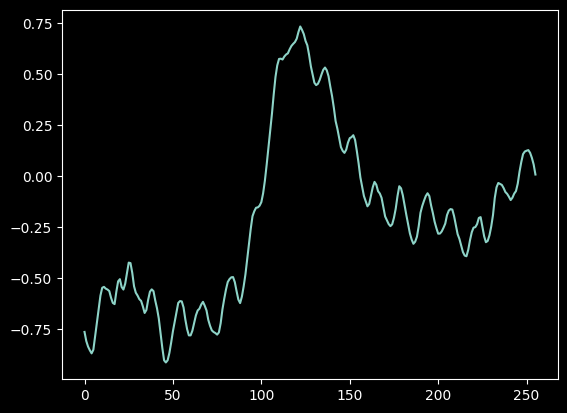

In [36]:
plt.plot(df2.iloc[2,:-1])

In [37]:
data = pd.concat([df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df13, df14, df15, df16, df17])

In [38]:
data.shape

(90630, 257)

In [39]:
data[256].value_counts()

1    48147
2    27244
0    15239
Name: 256, dtype: int64

# Extracting Seqlength(T) and Labels

In [40]:
X = data[data.columns[0:-1]].values
y = data[data.columns[-1]].values

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [42]:
print(X_train.shape)
print(X_test.shape)

(72504, 256)
(18126, 256)


# Reshaping to (Batchsize, seqlength, inputsize)

In [43]:
N_train = X_train.shape[0]
D = 1
T = X_train.shape[1]
N_test = X_test.shape[0]

In [44]:
X_train = X_train.reshape(N_train,T,D) # N x T x D
X_test = X_test.reshape(N_test,T,D)

In [45]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(72504, 256, 1)
(72504,)
(18126, 256, 1)
(18126,)


# Transform to Tensor and Using DataLoader

In [46]:
# Convert to tensor
train_data = torch.tensor(X_train).float()
train_labels = torch.tensor(y_train).long()
test_data = torch.tensor(X_test).float()
test_labels = torch.tensor(y_test).long()


# Convert to PyTorch Datasets
train_data = TensorDataset(train_data,train_labels)
test_data  = TensorDataset(test_data,test_labels)

# Translate into dataloader objects
batchsize    = 32
train_loader = DataLoader(train_data,batch_size=batchsize,shuffle=True,drop_last=True)
test_loader  = DataLoader(test_data,batch_size=batchsize, drop_last=True)

# Observe the batches of training and test data

In [47]:
for x,y in train_loader:
    break
print(x.shape)
print(y.shape)

torch.Size([32, 256, 1])
torch.Size([32])


In [48]:
print(y)

tensor([2, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 1, 0, 1, 2, 2, 2,
        2, 0, 1, 1, 2, 1, 1, 2])


In [49]:
for x,y in test_loader:
    break
print(x.shape)
print(y.shape)

torch.Size([32, 256, 1])
torch.Size([32])


# Creating the LSTM Model

In [50]:
class LSTM_model(nn.Module):
  def __init__(self,input_size, num_hidden, num_layers):
    super().__init__()

    # Define  parameters

    self.input_size = input_size
    self.num_hidden = num_hidden
    self.num_layers = num_layers

    # LSTM Layer

    self.lstm = nn.LSTM(input_size,num_hidden,num_layers, batch_first = True)

    # Output Layer

    self.out = nn.Linear(num_hidden,3)

  def forward(self,x):

    y, (h,c) = self.lstm(x)
    out = self.out(y)    # Output shape (batch, features, hidden)
    out = out[:,-1,:]    # Reshaped to (batch, hidden)

    return out, (h,c)

# Setting the Parameters

In [51]:
input_size  =  D     # D
hidden_size = 200
num_layers  =  1
seqlength   = T      # T

# Create the instance of the model

In [52]:
lstmModel = LSTM_model (input_size, hidden_size, num_layers)

# Training and Testing the model

In [ ]:
epochs = 101

# Loss function

lossfunc = nn.CrossEntropyLoss()

# optimizer

optimizer = torch.optim.SGD(lstmModel.parameters(), momentum = 0.9, lr = 0.01)

lstmModel.to(device) # placing a model on GPU

  # Initialize losses and Accuracies

losses    = torch.zeros(epochs)
trainAcc  = []
testAcc   = []


# loop over epochs

for epoch in range(epochs):
 lstmModel.train()

 # loop over training data batches

 batchAcc  = []
 batchLoss = []
 for X,y in train_loader:

  X = X.to(device) # Placing features on device
  y = y.to(device) # placing labels on device

  ypred, h = lstmModel(X)
  loss = lossfunc(ypred,y)


  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  # Append batchloss

  batchLoss.append(loss.item())

  ypred = ypred.cpu() # Back to cpu
  y = y.cpu()

  # compute batch accuracy

  acc = 100 * torch.mean((torch.argmax(ypred, dim=1) == y).float())
  batchAcc.append(acc)
# Batch loop concluded

# Average training accuracy (Outside the batchloop)

 trainAcc.append(np.mean(batchAcc))

# Losses through epochs

 losses[epoch] = np.mean(batchLoss)

# TESTING the model

 lstmModel.eval()

 with torch.no_grad():

    for X,y in test_loader:

            X = X.to(device)
            y = y.to(device)


            ypred, h =  lstmModel(X)
            ypred = ypred.cpu()
            y = y.cpu()

 with torch.no_grad(): #This step  Deactivating autogradient
  ypred, h = lstmModel(X)
  ypred = ypred.cpu()
  y = y.cpu()

 # Appending test accuracy

  testAcc.append(100 * torch.mean((torch.argmax(ypred,dim=1)==y).float()))
  if (epoch % 10) == 0:

        print(f' epochs : {epoch}  loss : {loss : 2.2f}')


 epochs : 0  loss :  1.02
 epochs : 10  loss :  0.97
 epochs : 20  loss :  1.24
 epochs : 30  loss :  0.90
 epochs : 40  loss :  0.71
 epochs : 50  loss :  0.51
 epochs : 60  loss :  0.55
 epochs : 70  loss :  0.10
 epochs : 80  loss :  0.42
 epochs : 90  loss :  0.57
 epochs : 100  loss :  0.19


# Plotting and Visualizing the Results

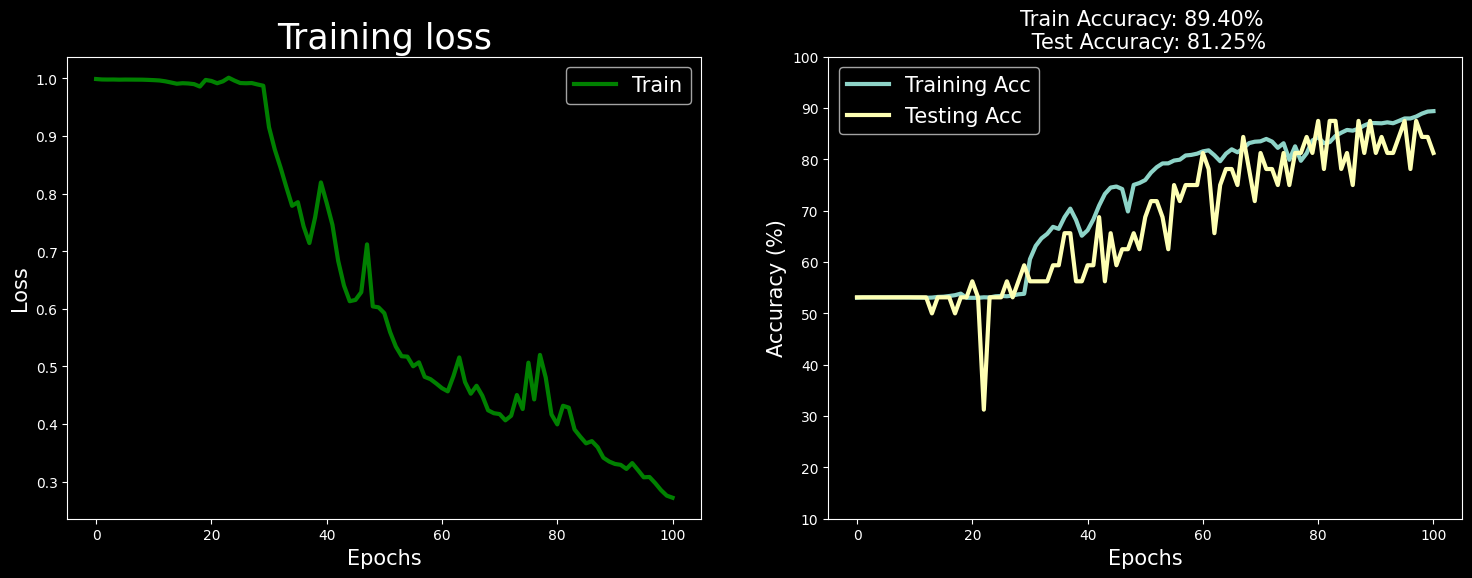

In [ ]:
fig,ax = plt.subplots(1,2,figsize=(18,6))

ax[0].plot(losses,'g', lw = 3)
ax[0].set_xlabel('Epochs', fontsize = 15)
ax[0].set_ylabel('Loss', fontsize = 15)
ax[0].legend(['Train','Test'], fontsize = 15)
ax[0].set_title('Training loss', fontsize = 25)

ax[1].plot(trainAcc,label='Training Acc', lw =3)
ax[1].plot(testAcc,label='Testing Acc', lw = 3)
ax[1].set_xlabel('Epochs', fontsize = 15)
ax[1].set_ylabel('Accuracy (%)', fontsize = 15)
ax[1].set_ylim([10,100])
ax[1].set_title(f'Train Accuracy: {trainAcc[-1]:.2f}% \n Test Accuracy: {testAcc[-1]:.2f}%', fontsize = 15)
ax[1].legend(fontsize = 15)

plt.show()